## 3 Linear Regression: Exercises
My solutions for the exercises in chapter 3.

### Conceptual

#### 1. 
Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these
p-values. Your explanation should be phrased in terms of `sales`, `TV`, `radio` , and `newspaper` , rather than in terms of the coefficients of the linear model.

This is Table 3.4:

|               | Coefficient | Std. Error | t-Statistic | p-Value   |
|---------------|-------------|------------|-------------|-----------|
| Intercept     | 2.939       | 0.3119     | 9.42        | < 0.0001  |
| `TV`          | 0.046       | 0.0014     | 32.81       | < 0.0001  |
| `radio`       | 0.189       | 0.0086     | 21.89       | < 0.0001  |
| `newspaper`   | -0.001      | 0.0059     | -0.18       | 0.8599    |

- The p-values each individually (without taking synergy into account) respond to the null hypothesis that the corresponding predictor has no predicting power on the target, the `sales`.
- For instance, the low p-value of < 0.0001 for `TV` answers to the null hypothesis, that TV advertisement is not a predictive factor for how high the `sales` are. Because the p-values is extremely low, is is very unlikely that we have found the evidence by chance. So we have to reject the null hypothesis. Same argument for `radio`.
- On the other hand, the p-value of 0.8599 for the `newspaper` feature is very high. It is corresponding to the null hypothesis, that newspaper advertisement is not a predictive factor for how high the `sales` are. And since we have found out that it is very likely to get results like this by pure chance, using the p-value, we fail to reject the null hypothesis.

### 2.
Carefully explain the differences between the KNN classifier and KNN regression methods.

- Both methods start the same way by remembering all the data $X$ passed to the model in fit() (at least in scikit-learn that happens during fit; statsmodels accepts X and y during the init already).

- When we pass new data for prediction, both methods would access the K nearest neighbours of this data using some defaults or user-passed distance method.

- KNN classifier then by default counts the mayority class of the K nearest neighbours and returns it as a prediction for the new data point.

- KNN regression by default averages the predictions of the K nearest neighbours and returns it as a prediction for the new data point.

### 3.
Suppose we have a data set with five predictors, $X_1 = GPA$, $X_2 = IQ$, $X_3 = Level$ (1 for College and 0 for High School), $X_4 =$ Interaction between GPA and IQ, and $X_5 =$ Interaction between GPA and Level. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta}_0 = 50, \hat{\beta}_1 = 20, \hat{\beta}_2 = 0.07, \hat{\beta}_3 = 35, \hat{\beta}_4 = 0.01, \hat{\beta}_5 = -10$.

(a) Which answer is correct, and why?

- i. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates.
- ii. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates.
- iii. For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.
- iv. For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates provided that the GPA is high enough.

    - Answer ii. is correct, because $\hat{\beta}_3$ shows a that for college graduates the entry level salary is on average 35.000 US-Dollar higher than for highschool graduates if we fix GPA and IQ, at least if we assume that our sample we trained on is large and random enough to make such predictions (which it is most likely not). Without the assumption, we can still say that in our data, college graduates earn more on average than high school graduates.
    - Answer iv. in particular is incorrect, because $\hat{\beta}_5$ modifies the influence on GPA in starting salary for college students so that GPA is less a factor for the hight of their starting salary.
    
    

(b) Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0.

In [1]:
prediction = 50 + 4*20 + 110*0.07 + 1*35 + (4*110)*0.01 + (1*4)*-10
prediction

137.1

(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

- False. How much evidence there is for an effect and the size of an effect are two separate things.

### 4.
I collect a set of data ($n$ = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = β_0 + β_1X + β_2X^2 + β_3X^3 + \epsilon$.

(a) Suppose that the true relationship between $X$ and $Y$ is linear, i.e. $Y = β_0 + β_1X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

- If we consider only the training RSS, there is a good chance that a high degree polynomial will be able to fit well to all the samples, especially since we only have 100 of them. Any of the scenarios can happen, depending on the variance of the irreducible error. If it is low, I would expect the linear regression model to outperform the polynomial model on the training data. If it is high, probably, the polynomial model will find a better fit (over fitting, since we know the true relationship is linear) on the training data than the linear model.

(b) Answer (a) using test rather than training RSS.

- On the test data, the linear model will have a lower RSS, since the true data has a linear relationship as well and the polynomial model with degree 3 will have over fit on the training data and thus have a lot of bias on the test data.

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

- In this case, I would expect the polynomial model to have a lower RSS, because it can bend (fit itself) better to the data.

(d) Answer (c) using test rather than training RSS.

- That cannot be answered, it depends on how much the true relationship differs from linear and on many other factors.

### 5.
Consider the fitted values that result from performing linear regression without an intercept. In this setting, the $i$ th fitted value takes the form </br>
$\hat{y}_i = x_i \hat{\beta}$,

where $\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2}$.

Show that we can write $\hat{y}_i = \sum_{i'=1}^{n} a_{i'} y_{i'}$.

What is $a_{i^′}$?

Note: We interpret this result by saying that the fitted values from linear regression are linear combinations of the response values.

- After spending half a day on it without finding out how to start this task, this is the [most comprehensible solution](https://rpubs.com/toleafar/219579) I found on the internet, and also some other solutions [like this one](https://www.lackos.xyz/itsl/Chapter3/conceptual), which are less clear than the first one, because they play around with the indices too much.

- Some things I discovered/learned along the way:

    - The formula for $\hat{\beta}$ was given in section 3.1.1, in the part "Optimization method: normal equation": $\hat{\beta} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2}$
    
    - The normal equation $X^TX\hat{\beta}​=X^Ty$ can also be written $\left( \sum_{i=1}^{n} x_i^2 \right) \hat{\beta} = \sum_{i=1}^{n} x_i y_i$ and solving for $\hat{\beta}$ gives the formula above.

    - I have researched about the strange index $i^′$ (which was not used in the book before, not even in section 3.1.1) and I have found out that $i^′$ is just to say that this is another index than the other $i$. It could also have been named $j$ and it could actually also be named $i$, since it is clearly used in different summations.

    - In the formula  $\hat{y}_i = \sum_{i'=1}^{n} a_{i'} y_{i'}$, the multiplication happens **before** the summation. In summation notation, it's a convention that the summation applies to the entire term immediately following the summation symbol.

    - $\hat{y}_i$ (and $x_i$ respectively) are *single values* and not vectors! Outside of summation symbols, variables with an index, represent the $i$ th value, not the whole vector.

    - It seems I should practice manipulating formulas containing summation symbols, which I did [here](https://github.com/StefanieSenger/mathy_coding/blob/main/summations.ipynb) before coming back here.

- Summing up:

    - $\hat{y}_i = x_i \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i'=1}^{n} x_{i'}^2} = \frac{x_i}{\sum_{i'=1}^n x_{i'}^2} \cdot \sum_{i=1}^n x_i y_i = \sum_{j=1}^n \frac{x_i x_{j}}{\sum_{i'=1}^n x_{i'}^2} y_{j} = \sum_{j=1}^{n} a_{j} y_{j}$

        - where $\frac{x_i}{\sum_{i'=1}^n x_{i'}^2}$ is a specific scalar value for each $i$ that normalises the contribution of each $x_i$​ to the prediction $\hat{y}_i$ making it proportional to the overall magnitude of the data

            - it is a scalar because it is the quotient of two single values: $x_i$​ is a single value for a specific observation $i$ and $\sum_{i'=1}^n x_{i'}^2$ is the sum of all $x_{i'}^2$​ which doesn't change based on the summation index $i′$, so the term is a single value as well

            - being specific to each observation $i$ means tha the value of this scalar depends on which $i$ we're looking at, but it does not depend on the $x_{i'}^2$ that appear in the summation

        - since it is a scalar, it applies uniformly across the summation and thus it can be pulled into the summation; we use a new summation index $j$ to avoid confusion

        - in $\sum_{j=1}^n \frac{x_i x_{j}}{\sum_{i'=1}^n x_{i'}^2}$, both indices $i$ and $i'$ now have fixed roles:

            - $i$ refers to the specific observation for which you're calculating $\hat{y}_i$

            - $i′$ is used for summing over the squares of the $x_{i'}$ and remains a constant sum value, so the summation doesn't change its value with respect to $i'$

            - the indices $i$ and $i'$ are part of the sum but now refer to different summations; they don't "interact" or need to be manipulated in this expression anymore once the sum over $i'$ has been evaluated
    
    - And finally: what is $a_{i^′}$? This is a scalar of weights that multiplied with the true target, leave us with the predicted target ...  ¯\\\_(ツ)_/¯


### 6
Using $\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$, argue that in the case of simple linear regression, the least squares line always passes through the point ($\bar{x}, \bar{y}$)

- This, again, is as task I have now idea how to start. I will explore it step by step using code this time, and hope this approach leads me somewhere.

- This is from my notes (copying it here te help me remember it): </br>

$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} = \frac{x_i^T y}{x^T x} = (x^T x)^{-1} x^T y$

In [1]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 8])

x_bar = np.mean(x)
y_bar = np.mean(y)

numerator = np.sum((x - x_bar) * (y - y_bar))
denominator = np.sum((x - x_bar) ** 2)
beta1 = numerator / denominator

print(f"beta1: {beta1}")


beta1: 1.6


(0.0, 8.32)

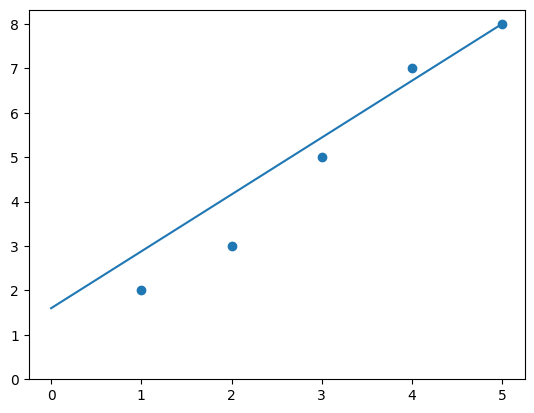

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(np.linspace(0, x.max(), 5), x*beta1)
plt.ylim(bottom=0)

Why doesn't the line go through the point (0,0)? We were only calculating yhat based on x, so I thought it had to go through (0,0)...